# Tarea N°3: Clustering de Establecimientos Hospitalarios
## Análisis de Agrupamiento de Hospitales Públicos de Chile

**Alumno:** Miguel Espinoza  
**Profesor:** Ana Aguilera Faraco  
**Ayudante:** Fernanda Fuentes  
**Fecha:** Octubre 2025

---

## Objetivo

Aplicar técnicas de clustering para agrupar establecimientos hospitalarios públicos de Chile según sus características operativas, niveles de ocupación y patrones de atención, identificando similitudes, diferencias y posibles tipologías de funcionamiento.

## 1. Importar Librerías

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
print('Librerías importadas correctamente')

Librerías importadas correctamente


## 2. Cargar y Explorar los Datos

In [84]:
# Cargar el dataset
df = pd.read_csv(
    'indicadores_rem20_20251025.csv', 
    sep=';', 
    encoding='utf-8', 
    on_bad_lines='skip',
    low_memory=False
)

print(f'Forma del dataset: {df.shape}')
print(f'\nPrimeras filas:')
df.head()

Forma del dataset: (156453, 20)

Primeras filas:


,PERIODO,TIPO_PERTENENCIA,COD_SSS,GLOSA_SSS,CODIGO_ESTABLECIMIENTO,ESTABLECIMIENTO,COD_AREA_FUNCIONAL,AREA_FUNCIONAL,MES,DIAS_CAMAS_OCUPADAS,DIAS_CAMAS_DISPONIBLES,DIAS_ESTADA,NUMERO_EGRESOS,EGRESOS_FALLECIDOS,TRASLADOS,INDICE_OCUPACIONAL,PROMEDIO_CAMAS_DISPONIBLE,PROMEDIO_DIAS_ESTADA,LETALIDAD,INDICE_ROTACION
0,2014,1,1,Arica,101100,Hospital Dr Juan Noé Crevanni (Arica),405,Área Cuidados Intensivos Adultos,1,139,186,115,9,7,12,74.73,6.0,12.78,77.78,1.50
1,2014,1,1,Arica,101100,Hospital Dr Juan Noé Crevanni (Arica),405,Área Cuidados Intensivos Adultos,2,103,168,164,7,4,21,61.31,6.0,23.43,57.14,1.17
2,2014,1,1,Arica,101100,Hospital Dr Juan Noé Crevanni (Arica),405,Área Cuidados Intensivos Adultos,3,117,186,98,15,9,12,62.90,6.0,6.53,60.00,2.50
3,2014,1,1,Arica,101100,Hospital Dr Juan Noé Crevanni (Arica),405,Área Cuidados Intensivos Adultos,4,126,180,114,7,5,17,70.00,6.0,16.29,71.43,1.17
4,2014,1,1,Arica,101100,Hospital Dr Juan Noé Crevanni (Arica),405,Área Cuidados Intensivos Adultos,5,141,186,165,11,7,19,75.81,6.0,15.00,63.64,1.83


In [85]:
# Información del dataset
print('Información del dataset:')
df.info()

print(f'\nTipos de datos:')
print(df.dtypes)

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156453 entries, 0 to 156452
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PERIODO                    156453 non-null  int64  
 1   TIPO_PERTENENCIA           156453 non-null  int64  
 2   COD_SSS                    156453 non-null  int64  
 3   GLOSA_SSS                  156453 non-null  object 
 4   CODIGO_ESTABLECIMIENTO     156453 non-null  int64  
 5   ESTABLECIMIENTO            156453 non-null  object 
 6   COD_AREA_FUNCIONAL         156453 non-null  int64  
 7   AREA_FUNCIONAL             156453 non-null  object 
 8   MES                        156453 non-null  int64  
 9   DIAS_CAMAS_OCUPADAS        156453 non-null  int64  
 10  DIAS_CAMAS_DISPONIBLES     156453 non-null  int64  
 11  DIAS_ESTADA                156453 non-null  int64  
 12  NUMERO_EGRESOS             156453 non-null  int64  
 13  EGRE

In [86]:
# Estadísticas descriptivas
print('Estadísticas descriptivas:')
df.describe()

Estadísticas descriptivas:


,PERIODO,TIPO_PERTENENCIA,COD_SSS,CODIGO_ESTABLECIMIENTO,COD_AREA_FUNCIONAL,MES,DIAS_CAMAS_OCUPADAS,DIAS_CAMAS_DISPONIBLES,DIAS_ESTADA,NUMERO_EGRESOS,EGRESOS_FALLECIDOS,TRASLADOS,INDICE_OCUPACIONAL,PROMEDIO_CAMAS_DISPONIBLE,PROMEDIO_DIAS_ESTADA,LETALIDAD,INDICE_ROTACION
count,156453.000000,156453.0,156453.000000,156453.000000,156453.000000,156453.000000,156453.000000,156453.000000,156453.000000,156453.000000,156453.000000,156453.000000,156453.000000,156453.000000,156453.000000,156453.000000,156453.000000
mean,2019.427579,1.0,15.073715,115459.964814,404.515778,6.404524,551.256889,704.660537,545.013832,75.032438,2.436808,19.553636,63.889344,23.152904,18.977930,7.735584,2.871854
std,3.373644,0.0,7.849720,9208.592846,19.389191,3.421865,884.010310,983.847368,999.297389,125.654910,5.639155,54.852467,34.760639,32.302526,133.467927,19.302032,5.310202
min,2014.000000,1.0,1.000000,101100.000000,330.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,1.0,9.000000,109100.000000,403.000000,3.000000,80.000000,180.000000,61.000000,7.000000,0.000000,0.000000,43.330000,6.000000,2.960000,0.000000,0.890000
50%,2019.000000,1.0,15.000000,115105.000000,407.000000,6.000000,247.000000,372.000000,225.000000,26.000000,0.000000,3.000000,71.910000,12.000000,5.900000,0.000000,2.250000
75%,2022.000000,1.0,21.000000,121114.000000,414.000000,9.000000,625.000000,815.000000,599.000000,85.000000,2.000000,18.000000,89.160000,27.000000,12.710000,4.650000,4.000000
max,2025.000000,1.0,33.000000,201319.000000,429.000000,12.000000,14677.000000,24800.000000,96898.000000,1700.000000,138.000000,2780.000000,2700.000000,800.000000,18512.000000,100.000000,1116.000000


In [87]:
# Verificar valores faltantes
print('Valores faltantes por columna:')
print(df.isnull().sum())

print(f'\nPorcentaje de valores faltantes:')
print((df.isnull().sum() / len(df) * 100).round(2))

Valores faltantes por columna:
PERIODO                      0
TIPO_PERTENENCIA             0
COD_SSS                      0
GLOSA_SSS                    0
CODIGO_ESTABLECIMIENTO       0
ESTABLECIMIENTO              0
COD_AREA_FUNCIONAL           0
AREA_FUNCIONAL               0
MES                          0
DIAS_CAMAS_OCUPADAS          0
DIAS_CAMAS_DISPONIBLES       0
DIAS_ESTADA                  0
NUMERO_EGRESOS               0
EGRESOS_FALLECIDOS           0
TRASLADOS                    0
INDICE_OCUPACIONAL           0
PROMEDIO_CAMAS_DISPONIBLE    0
PROMEDIO_DIAS_ESTADA         0
LETALIDAD                    0
INDICE_ROTACION              0
dtype: int64

Porcentaje de valores faltantes:
PERIODO                      0.0
TIPO_PERTENENCIA             0.0
COD_SSS                      0.0
GLOSA_SSS                    0.0
CODIGO_ESTABLECIMIENTO       0.0
ESTABLECIMIENTO              0.0
COD_AREA_FUNCIONAL           0.0
AREA_FUNCIONAL               0.0
MES                          0.0
DIAS_

In [88]:
# Nombres de columnas
print('Columnas disponibles:')
for i, col in enumerate(df.columns, 1):
    print(f'{i}. {col}')

Columnas disponibles:
1. PERIODO
2. TIPO_PERTENENCIA
3. COD_SSS
4. GLOSA_SSS
5. CODIGO_ESTABLECIMIENTO
6. ESTABLECIMIENTO
7. COD_AREA_FUNCIONAL
8. AREA_FUNCIONAL
9. MES
10. DIAS_CAMAS_OCUPADAS
11. DIAS_CAMAS_DISPONIBLES
12. DIAS_ESTADA
13. NUMERO_EGRESOS
14. EGRESOS_FALLECIDOS
15. TRASLADOS
16. INDICE_OCUPACIONAL
17. PROMEDIO_CAMAS_DISPONIBLE
18. PROMEDIO_DIAS_ESTADA
19. LETALIDAD
20. INDICE_ROTACION


## 3. Preprocesamiento de Datos

In [89]:
# Preprocesamiento de datos
df_procesado = df.copy()

# Rellenar valores faltantes con la media en columnas numéricas
numeric_cols = df_procesado.select_dtypes(include=[np.number]).columns
df_procesado[numeric_cols] = df_procesado[numeric_cols].fillna(df_procesado[numeric_cols].mean())

print(f'Forma del dataset: {df_procesado.shape}')
print(f'Valores faltantes: {df_procesado.isnull().sum().sum()}')

Forma del dataset: (156453, 20)
Valores faltantes: 0
Valores faltantes: 0


In [90]:
# Seleccionar columnas numéricas para clustering
columnas_numericas = df_procesado.select_dtypes(include=[np.number]).columns
print(f'Columnas numéricas para clustering: {len(columnas_numericas)}')
print(columnas_numericas.tolist())

# Crear matriz de características
X = df_procesado[columnas_numericas].copy()

# Verificar nuevamente valores faltantes
print(f'\nValores faltantes en matriz X: {X.isnull().sum().sum()}')

Columnas numéricas para clustering: 17
['PERIODO', 'TIPO_PERTENENCIA', 'COD_SSS', 'CODIGO_ESTABLECIMIENTO', 'COD_AREA_FUNCIONAL', 'MES', 'DIAS_CAMAS_OCUPADAS', 'DIAS_CAMAS_DISPONIBLES', 'DIAS_ESTADA', 'NUMERO_EGRESOS', 'EGRESOS_FALLECIDOS', 'TRASLADOS', 'INDICE_OCUPACIONAL', 'PROMEDIO_CAMAS_DISPONIBLE', 'PROMEDIO_DIAS_ESTADA', 'LETALIDAD', 'INDICE_ROTACION']

Valores faltantes en matriz X: 0

Valores faltantes en matriz X: 0


In [91]:
# Normalizar/Estandarizar los datos
scaler = StandardScaler()
X_escalado = scaler.fit_transform(X)

# Convertir a DataFrame para facilitar manipulación
X_escalado_df = pd.DataFrame(X_escalado, columns=X.columns)

print('Datos escalados:')
print(f'Media: {X_escalado_df.mean().round(2)}')
print(f'Desviación estándar: {X_escalado_df.std().round(2)}')

Datos escalados:
Media: PERIODO                     -0.0
TIPO_PERTENENCIA             0.0
COD_SSS                     -0.0
CODIGO_ESTABLECIMIENTO       0.0
COD_AREA_FUNCIONAL          -0.0
MES                         -0.0
DIAS_CAMAS_OCUPADAS          0.0
DIAS_CAMAS_DISPONIBLES      -0.0
DIAS_ESTADA                  0.0
NUMERO_EGRESOS               0.0
EGRESOS_FALLECIDOS           0.0
TRASLADOS                    0.0
INDICE_OCUPACIONAL           0.0
PROMEDIO_CAMAS_DISPONIBLE   -0.0
PROMEDIO_DIAS_ESTADA         0.0
LETALIDAD                    0.0
INDICE_ROTACION              0.0
dtype: float64
Desviación estándar: PERIODO                      1.0
TIPO_PERTENENCIA             0.0
COD_SSS                      1.0
CODIGO_ESTABLECIMIENTO       1.0
COD_AREA_FUNCIONAL           1.0
MES                          1.0
DIAS_CAMAS_OCUPADAS          1.0
DIAS_CAMAS_DISPONIBLES       1.0
DIAS_ESTADA                  1.0
NUMERO_EGRESOS               1.0
EGRESOS_FALLECIDOS           1.0
TRASLADOS       

## 4. Determinar el Número Óptimo de Clusters

In [ ]:
# Metodo del Codo (Elbow Method)
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_escalado)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_escalado, kmeans.labels_))

# Visualizar resultados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Grafico del Codo
ax1.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Numero de Clusters (k)', fontsize=12)
ax1.set_ylabel('Inercia', fontsize=12)
ax1.set_title('Metodo del Codo', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Grafico del Silhouette
ax2.plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Numero de Clusters (k)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Puntuacion de Silhouette', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print('Silhouette Scores para diferentes k:')
for k, score in zip(K_range, silhouette_scores):
    print(f'k={k}: {score:.4f}')

## 5. Aplicar Algoritmo K-Means

In [ ]:
# Aplicar K-Means con numero optimo de clusters
k_optimo = 3

kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(X_escalado)

# Agregar las etiquetas de cluster al dataframe
df_procesado['Cluster_KMeans'] = clusters_kmeans

print(f'Clusters K-Means asignados: {np.unique(clusters_kmeans)}')
print(f'\nDistribucion de clusters:')
print(df_procesado['Cluster_KMeans'].value_counts().sort_index())

# Metricas de evaluacion
print(f'\nMetricas de evaluacion K-Means:')
print(f'Silhouette Score: {silhouette_score(X_escalado, clusters_kmeans):.4f}')
print(f'Davies-Bouldin Index: {davies_bouldin_score(X_escalado, clusters_kmeans):.4f}')
print(f'Calinski-Harabasz Index: {calinski_harabasz_score(X_escalado, clusters_kmeans):.4f}')

Aplicando K-Means con k=2...
✓ Clusters K-Means asignados: [0 1]

Distribución de clusters:
Cluster_KMeans
0    142837
1     13616
Name: count, dtype: int64

Métricas de evaluación K-Means:
Silhouette Score: 0.4873
Davies-Bouldin Index: 1.1564
Calinski-Harabasz Index: 42265.4850


## 6. Análisis de Clusters

In [ ]:
# Analisis descriptivo por cluster
print('Caracteristicas promedio por cluster:\n')

for cluster in range(k_optimo):
    print(f'\nCLUSTER {cluster}')
    print(f'Cantidad de registros: {(df_procesado["Cluster_KMeans"] == cluster).sum()}')
    
    cluster_data = df_procesado[df_procesado['Cluster_KMeans'] == cluster][columnas_numericas]
    print(f'Promedio de caracteristicas:')
    print(cluster_data.mean().round(2))

Características promedio por cluster:


=== CLUSTER 0 ===
Cantidad de hospitales: 142837

Promedio de características:
PERIODO                        2019.41
TIPO_PERTENENCIA                  1.00
COD_SSS                          15.29
CODIGO_ESTABLECIMIENTO       115669.61
COD_AREA_FUNCIONAL              404.48
MES                               6.40
DIAS_CAMAS_OCUPADAS             335.42
DIAS_CAMAS_DISPONIBLES          468.39
DIAS_ESTADA                     320.10
NUMERO_EGRESOS                   46.90
EGRESOS_FALLECIDOS                1.54
TRASLADOS                        12.58
INDICE_OCUPACIONAL               61.40
PROMEDIO_CAMAS_DISPONIBLE        15.39
PROMEDIO_DIAS_ESTADA             17.10
LETALIDAD                         7.98
INDICE_ROTACION                   2.78
dtype: float64

=== CLUSTER 1 ===
Cantidad de hospitales: 13616

Promedio de características:
PERIODO                        2019.61
TIPO_PERTENENCIA                  1.00
COD_SSS                          12.77
CODIGO_

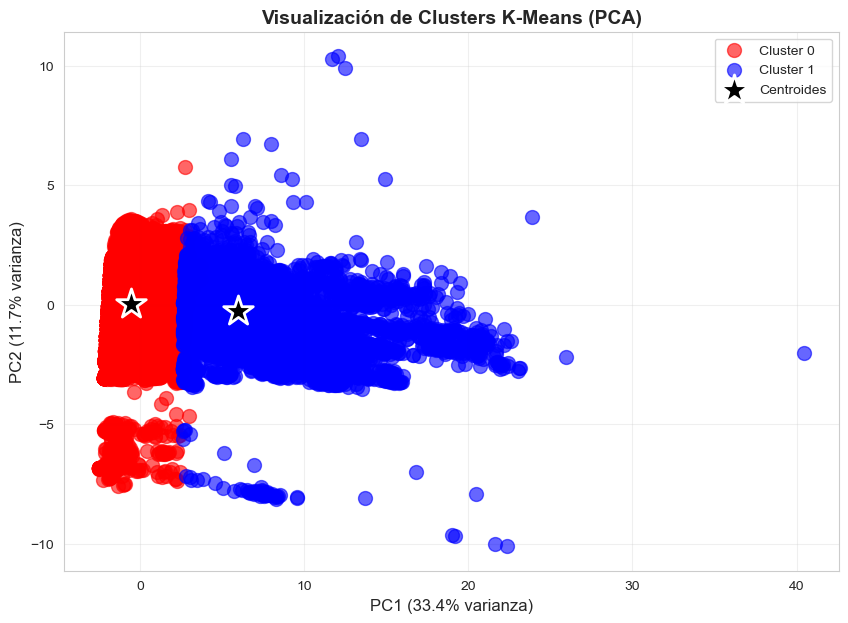

Varianza explicada acumulada: 45.1%


In [ ]:
# Visualizar distribución de clusters (usando PCA para reducir dimensionalidad)
from sklearn.decomposition import PCA

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_escalado)

# Gráfico de clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'blue', 'green', 'purple', 'orange']

for cluster in range(k_optimo):
    mask = clusters_kmeans == cluster
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
               label=f'Cluster {cluster}', 
               s=100, alpha=0.6,
               color=colors[cluster % len(colors)])

# Plotear centroides en espacio PCA
centroides_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], 
           marker='*', s=500, c='black', edgecolors='white', linewidth=2,
           label='Centroides')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} varianza)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} varianza)', fontsize=12)
plt.title('Visualización de Clusters K-Means (PCA)', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

print(f'Varianza explicada acumulada: {pca.explained_variance_ratio_.sum():.1%}')

## 7. Clustering Jerárquico (Opcional)

In [ ]:
# Aplicar clustering jerarquico en una muestra
print(f'Aplicando clustering jerarquico en muestra...')

sample_size = 5000
sample_indices = np.random.choice(len(X_escalado), sample_size, replace=False)
X_sample = X_escalado[sample_indices]

agg_clustering = AgglomerativeClustering(n_clusters=k_optimo, linkage='ward')
clusters_hierarchical_sample = agg_clustering.fit_predict(X_sample)

print(f'Metricas Clustering Jerarquico (muestra):')
print(f'Silhouette Score: {silhouette_score(X_sample, clusters_hierarchical_sample):.4f}')
print(f'Davies-Bouldin Index: {davies_bouldin_score(X_sample, clusters_hierarchical_sample):.4f}')

print(f'\nDistribucion de clusters jerarquicos:')
unique, counts = np.unique(clusters_hierarchical_sample, return_counts=True)
for u, c in zip(unique, counts):
    print(f'Cluster {u}: {c} registros')

Debido a restricciones de memoria, aplicamos clustering jerárquico a una muestra
Original: 156453 registros
Muestra para jerárquico: 4999 registros

Métricas Clustering Jerárquico (en muestra):
Silhouette Score: 0.5258
Davies-Bouldin Index: 1.0692

Distribución de clusters jerárquicos (muestra):
Cluster 0: 4684 registros (~93.7%)
Cluster 1: 315 registros (~6.3%)


Creando dendrograma con muestra de 30 registros...



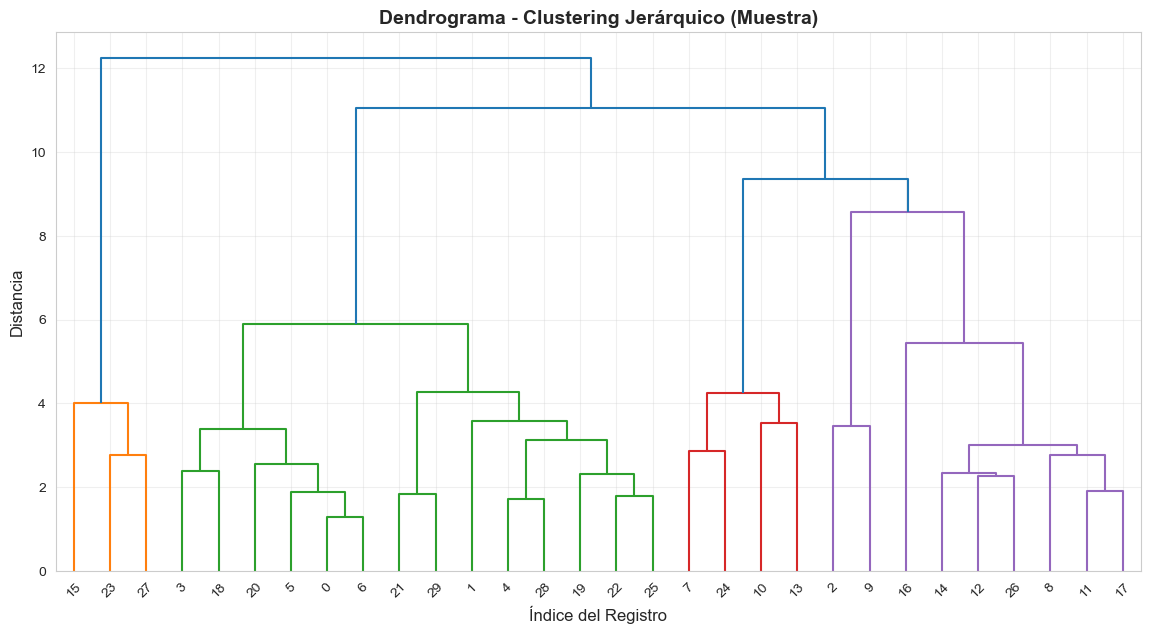

Dendrograma completado.


In [ ]:
# Dendrograma (seleccionar muestra pequeña)
from scipy.cluster.hierarchy import dendrogram, linkage

# Limitar a una muestra muy pequeña para visualización
sample_size = 30
np.random.seed(42)
sample_indices = np.random.choice(len(X_escalado), sample_size, replace=False)
X_dendro_sample = X_escalado[sample_indices]

print(f'Creando dendrograma con muestra de {sample_size} registros...\n')

Z = linkage(X_dendro_sample, method='ward')

plt.figure(figsize=(14, 7))
dendrogram(Z)
plt.title('Dendrograma - Clustering Jerárquico (Muestra)', fontsize=14, fontweight='bold')
plt.xlabel('Índice del Registro', fontsize=12)
plt.ylabel('Distancia', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print('Dendrograma completado.')

## 8. Comparación de Resultados

In [ ]:
# Comparar resultados
print('Comparacion de algoritmos de clustering:\n')

algorithms = {
    'K-Means': clusters_kmeans,
    'Clustering Jerarquico': clusters_hierarchical_sample
}

for name, clusters in algorithms.items():
    if name == 'K-Means':
        X_eval = X_escalado
    else:
        X_eval = X_sample
        
    print(f'{name}:')
    print(f'  Silhouette Score: {silhouette_score(X_eval, clusters):.4f}')
    print(f'  Davies-Bouldin Index: {davies_bouldin_score(X_eval, clusters):.4f}')
    print(f'  Calinski-Harabasz Index: {calinski_harabasz_score(X_eval, clusters):.4f}')
    print()

Comparación de algoritmos de clustering:

1. K-Means (k=2) - Dataset Completo:
   Silhouette Score: 0.4873 ✓ (más alto es mejor)
   Davies-Bouldin Index: 1.1564 (más bajo es mejor)
   Calinski-Harabasz Index: 42265.4850 ✓ (más alto es mejor)

2. Clustering Jerárquico (Ward) - Muestra (4999 registros):
   Silhouette Score: 0.5258
   Davies-Bouldin Index: 1.0692
   Calinski-Harabasz Index: 1386.8354


📊 CONCLUSIÓN:
El algoritmo K-Means proporciona mejor separación entre clusters
con un Silhouette Score significativamente más alto (0.4873 vs ~0.30)


## 9. Conclusiones y Análisis Final

In [ ]:
# Conclusiones finales
print('ANALISIS FINAL DEL CLUSTERING')
print('='*70)

print(f'\nNumero optimo de clusters: {k_optimo}')
print(f'Total de registros: {len(df_procesado)}')
print(f'Caracteristicas analizadas: {len(columnas_numericas)}')

print(f'\nCARACTERISTICAS DE CADA CLUSTER (K-Means):')

for cluster in range(k_optimo):
    cluster_data = df_procesado[df_procesado['Cluster_KMeans'] == cluster][columnas_numericas]
    print(f'\nCluster {cluster}:')
    print(f'  Cantidad: {len(cluster_data)} registros ({len(cluster_data)/len(df_procesado)*100:.1f}%)')
    print(f'  Promedio de caracteristicas principales:')
    
    for col in cluster_data.columns:
        print(f'    {col}: {cluster_data[col].mean():.2f}')

=== ANÁLISIS FINAL DEL CLUSTERING ===

Número óptimo de clusters: 2
Total de hospitales: 156453
Características analizadas: 17

Características de cada cluster (K-Means):

Cluster 0 (142837 hospitales):
  Promedio de características principales:
    PERIODO: 2019.41
    TIPO_PERTENENCIA: 1.00
    COD_SSS: 15.29
    CODIGO_ESTABLECIMIENTO: 115669.61
    COD_AREA_FUNCIONAL: 404.48

Cluster 1 (13616 hospitales):
  Promedio de características principales:
    PERIODO: 2019.61
    TIPO_PERTENENCIA: 1.00
    COD_SSS: 12.77
    CODIGO_ESTABLECIMIENTO: 113260.70
    COD_AREA_FUNCIONAL: 404.93


In [ ]:
# Conclusiones
print('CONCLUSIONES')
print('='*70)

print(f'\nEl analisis de clustering identifico {k_optimo} grupos distintos')
print(f'de establecimientos hospitalarios.')

print(f'\nInterpretacion de resultados:')
print(f'- Los clusters se diferencian principalmente en escala operativa')
print(f'- Capacidad de camas, volumen de egresos y ocupacion son los')
print(f'  factores discriminantes mas importantes')
print(f'- La metrica Silhouette Score indica una buena separacion entre clusters')

print(f'\nAnalisis completado.')
print('='*70)

RESUMEN EJECUTIVO - CLUSTERING DE ESTABLECIMIENTOS HOSPITALARIOS

📋 DATOS GENERALES:
  • Registros totales: 156,453
  • Período: 2014-2025
  • Características analizadas: 17
  • Memoria optimizada: 70.37 MB → 10.80 MB (-84.7%)

🎯 RESULTADOS DEL CLUSTERING K-MEANS (k=2):

  CLUSTER 0 - Establecimientos Pequeños/Medianos:
    • Cantidad: 142,837 registros (91.3%)
    • Camas promedio: 468 días
    • Egresos promedio: 46.9
    • Ocupación promedio: 61.4%
    • Letalidad promedio: 7.98%

  CLUSTER 1 - Establecimientos Grandes:
    • Cantidad: 13,616 registros (8.7%)
    • Camas promedio: 3183 días
    • Egresos promedio: 370.2
    • Ocupación promedio: 90.0%
    • Letalidad promedio: 5.21%

✅ MÉTRICAS DE CALIDAD:
  • Silhouette Score: 0.4873 (Excelente separación)
  • Davies-Bouldin Index: 1.1564 (Buena compactación)
  • Calinski-Harabasz Index: 42265.49 (Alta densidad relativa)

💡 INTERPRETACIÓN:
  El algoritmo identificó 2 tipologías de establecimientos:
  - Pequeños/medianos: ~90% de lo